<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


data = pd.read_csv('/datasets/Churn.csv')
display(data.head())
data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
list_old = [column for column in data]
list_new = [column.lower() for column in list_old]
data.columns = list_new
data = data.rename(
    columns={
        'customerid' : 'customer_id',
        'creditscore' : 'credit_score',
        'numofproducts' : 'num_of_products',
        'hascrcard' : 'has_cr_card',
        'isactivemember' : 'is_active_member',
        'estimatedsalary' : 'estimated_salary',
    }
)

In [4]:
data = data.drop('rownumber', axis=1)
data = data.drop('surname', axis=1)

In [5]:
data = data.dropna(subset=['tenure'])

In [6]:
data = data.drop_duplicates()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9091 non-null   int64  
 1   credit_score      9091 non-null   int64  
 2   geography         9091 non-null   object 
 3   gender            9091 non-null   object 
 4   age               9091 non-null   int64  
 5   tenure            9091 non-null   float64
 6   balance           9091 non-null   float64
 7   num_of_products   9091 non-null   int64  
 8   has_cr_card       9091 non-null   int64  
 9   is_active_member  9091 non-null   int64  
 10  estimated_salary  9091 non-null   float64
 11  exited            9091 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 923.3+ KB


**Вывод**

В качестве исходной предобработки данных были удалены ненужные столбцы, которые замедлят обучение модели, также были удалены строки с пропущенными значениями для лучшего обучения модели. Также были удалены явные дубликаты в данных. Предобработка данных выполнена. Также названия столбцов были приведены к нижнему регистру.

## Исследование задачи

In [8]:
# расчет дисбалланса классов
print(len(data.loc[data['exited'] == 1]) / len(data.loc[data['exited'] == 0]))

0.2561835014508774


In [9]:
# разделение выборки на тренировочную, валидационную и тестовую
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['exited']
features = data_ohe.drop(['exited'] , axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

In [10]:
# модель обучающего дерева
spisok_f1 = []
spisok_auc_roc = []

for i in range(1, 16):
    model_tree = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model_tree.fit(features_train, target_train)
    
    # расчет метрики AUC-ROC
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    spisok_auc_roc.append(auc_roc)
    
    # расчет метрики F1
    predictions_valid = model_tree.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    spisok_f1.append(f1)

# создание константной модели
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print('Для f1 max_depth =', np.argmax(spisok_auc_roc), ':', max(spisok_f1))  
print('Точнсть константной модели:', f1)
print('Для auc_roc max_depth =', np.argmax(spisok_f1), ':', max(spisok_auc_roc))

Для f1 max_depth = 5 : 0.5759493670886077
Точнсть константной модели: 0.0
Для auc_roc max_depth = 6 : 0.8425699070605623


In [11]:
# модель обучающего леса деревьев
best_result = 0
best_est = 0
best_depth = 0

best_result_auc = 0
best_est_auc = 0
best_depth_auc = 0

for est in range(10, 101, 10):
    for depth in range (1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train) 
        
        # расчет метрики F1
        predictions_valid = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
       
        # расчет метрики AUC-ROC
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_auc = roc_auc_score(target_valid, probabilities_one_valid)
        if result_auc > best_result_auc:
            best_result_auc = result_auc
            best_est_auc = est
            best_depth_auc = depth

# создание константной модели        
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print("f1_score наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", depth)
print('Точнсть константной модели:', f1)
print("auc_roc_score наилучшей модели на валидационной выборке:", best_result_auc, 
      "Количество деревьев:", best_est_auc, 
      "Максимальная глубина:", best_depth_auc)

f1_score наилучшей модели на валидационной выборке: 0.5806451612903226 Количество деревьев: 80 Максимальная глубина: 14
Точнсть константной модели: 0.0
auc_roc_score наилучшей модели на валидационной выборке: 0.8718470263613723 Количество деревьев: 90 Максимальная глубина: 9


In [12]:
# модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

# расчет метрики AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC мера:', auc_roc)

AUC-ROC мера: 0.569062156585189


**Вывод**

Данные были изучены на дисбаланс классов. Он составил слудеющее соотношение: люди, оставшиеся в банке / люди, ушедшие из банка = 0.25. 

Исходя из первичного обучения модели можно сделать вывод о том, что модель обучается довольно хорошо и без балансирования признаков. Наилучших результатов достигла модель при обучении лесом деревьев. Точность по метрике f1 составила 0.58, точность по метрике auc_roc составила 0.87. Хуже всего модель обучается по линейной регрессии. 

## Борьба с дисбалансом

**Метод class weight**

In [13]:
# модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predicted_valid = model.predict(features_valid)

print('AUC-ROC мера:', roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC-ROC мера: 0.7561872189405752
F1: 0.4980988593155894


In [14]:
# модель обучающего леса деревьев
best_result = 0
best_est = 0
best_depth = 0

best_result_auc = 0
best_est_auc = 0
best_depth_auc = 0

for est in range(10, 101, 10):
    for depth in range (1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_forest.fit(features_train, target_train) 
        
        # расчет метрики F1
        predictions_valid = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
        
        # расчет метрики AUC-ROC
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_auc = roc_auc_score(target_valid, probabilities_one_valid)
        if result_auc > best_result_auc:
            best_result_auc = result_auc
            best_est_auc = est
            best_depth_auc = depth
        
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print("f1_score наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", depth)
print('Точнсть константной модели:', f1)
print("auc_roc_score наилучшей модели на валидационной выборке:", best_result_auc, 
      "Количество деревьев:", best_est_auc, 
      "Максимальная глубина:", best_depth_auc)

f1_score наилучшей модели на валидационной выборке: 0.6456043956043955 Количество деревьев: 70 Максимальная глубина: 14
Точнсть константной модели: 0.0
auc_roc_score наилучшей модели на валидационной выборке: 0.8695663378474644 Количество деревьев: 100 Максимальная глубина: 8


In [16]:
# модель обучающего дерева
spisok_f1 = []
spisok_auc_roc = []

for i in range(1, 16):
    model_tree = DecisionTreeClassifier(max_depth=i, random_state=12345, class_weight='balanced')
    model_tree.fit(features_train, target_train)
    
    # расчет метрики AUC-ROC
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    spisok_auc_roc.append(auc_roc)
    
    # расчет метрики F1
    predictions_valid = model_tree.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    spisok_f1.append(f1)
    
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print('Для f1 max_depth =', np.argmax(spisok_auc_roc), ':', max(spisok_f1))  
print('Точнсть константной модели:', f1)
print('Для auc_roc max_depth =', np.argmax(spisok_f1), ':', max(spisok_auc_roc))

Для f1 max_depth = 4 : 0.5705196182396607
Точнсть константной модели: 0.0
Для auc_roc max_depth = 4 : 0.8345423989014407


**Вывод**

Метод class_weight сработал для модели леса деревьев, точность на метрике f1 достигла 0.64.

**Метод UPSAMPLING**

In [18]:
# написание функции, которая будет увеличивать размер выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
#увеличение размера выборки
features_upsampled, target_upsampled = upsample(features_train, target_train, 9)

In [19]:
# модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predicted_valid = model.predict(features_valid)

print('AUC-ROC мера:', roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC-ROC мера: 0.5692830465138967
F1: 0.34350797266514804


In [20]:
# модель обучающего леса деревьев
best_result = 0
best_est = 0
best_depth = 0

best_result_auc = 0
best_est_auc = 0
best_depth_auc = 0

for est in range(10, 101, 10):
    for depth in range (1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled) 
        
        # вычисление метрики f1
        predictions_valid = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
        
        # вычисление метрики AUC-ROC
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_auc = roc_auc_score(target_valid, probabilities_one_valid)
        if result_auc > best_result_auc:
            best_result_auc = result_auc
            best_est_auc = est
            best_depth_auc = depth
        
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print("f1_score наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", depth)
print('Точнсть константной модели:', f1)
print("auc_roc_score наилучшей модели на валидационной выборке:", best_result_auc, 
      "Количество деревьев:", best_est_auc, 
      "Максимальная глубина:", best_depth_auc)

f1_score наилучшей модели на валидационной выборке: 0.6388206388206389 Количество деревьев: 70 Максимальная глубина: 14
Точнсть константной модели: 0.0
auc_roc_score наилучшей модели на валидационной выборке: 0.8619474760564519 Количество деревьев: 90 Максимальная глубина: 11


In [21]:
# модель обучающего дерева
spisok_f1 = []
spisok_auc_roc = []

for i in range(1, 16):
    model_tree = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model_tree.fit(features_upsampled, target_upsampled)
    
    # вычисление метрики AUC-ROC
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    spisok_auc_roc.append(auc_roc)
    
     # вычисление метрики f1
    predictions_valid = model_tree.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    spisok_f1.append(f1)
    
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print('Для f1 max_depth =', np.argmax(spisok_auc_roc), ':', max(spisok_f1))  
print('Точнсть константной модели:', f1)
print('Для auc_roc max_depth =', np.argmax(spisok_f1), ':', max(spisok_auc_roc))

Для f1 max_depth = 4 : 0.5318791946308725
Точнсть константной модели: 0.0
Для auc_roc max_depth = 5 : 0.8399836541452756


**Вывод**

Метод upsampling сработал для модели леса деревьев, точность на метрике f1 достигла 0.63.

**Метод DOWNSAMPLING**

In [22]:
# наипсание функции, которая уменьшает размер выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

# создание уменьшенной тренировочной выборки
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

In [23]:
# модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predicted_valid = model.predict(features_valid)

print('AUC-ROC мера:', roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC-ROC мера: 0.5692296647811258
F1: 0.34350797266514804


In [24]:
# модель обучающего леса деревьев
best_result = 0
best_est = 0
best_depth = 0

best_result_auc = 0
best_est_auc = 0
best_depth_auc = 0

for est in range(10, 101, 10):
    for depth in range (1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_downsampled, target_downsampled) 
        
        # вычисление метрики f1
        predictions_valid = model_forest.predict(features_valid) 
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
        
        # вычисление метрики AUC-ROC
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_auc = roc_auc_score(target_valid, probabilities_one_valid)
        if result_auc > best_result_auc:
            best_result_auc = result_auc
            best_est_auc = est
            best_depth_auc = depth
        
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print("f1_score наилучшей модели на валидационной выборке:", 
      best_result, "Количество деревьев:", best_est, 
      "Максимальная глубина:", depth)
print('Точнсть константной модели:', f1)
print("auc_roc_score наилучшей модели на валидационной выборке:", best_result_auc, 
      "Количество деревьев:", best_est_auc, 
      "Максимальная глубина:", best_depth_auc)

f1_score наилучшей модели на валидационной выборке: 0.4794223826714802 Количество деревьев: 10 Максимальная глубина: 14
Точнсть константной модели: 0.0
auc_roc_score наилучшей модели на валидационной выборке: 0.8629138694945486 Количество деревьев: 80 Максимальная глубина: 8


In [25]:
# модель дерева решений
spisok_f1 = []
spisok_auc_roc = []

for i in range(1, 16):
    model_tree = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model_tree.fit(features_downsampled, target_downsampled)
    
    # вычисление метрики AUC-ROC
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    spisok_auc_roc.append(auc_roc)
    
    # вычисление метрики f1
    predictions_valid = model_tree.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    spisok_f1.append(f1)
    
target_pred_constant = pd.Series([0]*len(target_valid))
f1 = f1_score(target_valid, target_pred_constant)

print('Для f1 max_depth =', np.argmax(spisok_auc_roc), ':', max(spisok_f1))  
print('Точнсть константной модели:', f1)
print('Для auc_roc max_depth =', np.argmax(spisok_f1), ':', max(spisok_auc_roc))

Для f1 max_depth = 4 : 0.5165257494235204
Точнсть константной модели: 0.0
Для auc_roc max_depth = 4 : 0.8338171436355168


**Вывод**

Метод downsampling сработал плохо для всех моделей, точность f1 упала везде.

**Изменение порога**

In [26]:
# модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.6, 0.05):
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1))

Порог = 0.00 | f1 = 0.344
Порог = 0.05 | f1 = 0.344
Порог = 0.10 | f1 = 0.344
Порог = 0.15 | f1 = 0.357
Порог = 0.20 | f1 = 0.371
Порог = 0.25 | f1 = 0.248
Порог = 0.30 | f1 = 0.044
Порог = 0.35 | f1 = 0.005
Порог = 0.40 | f1 = 0.000
Порог = 0.45 | f1 = 0.000
Порог = 0.50 | f1 = 0.000
Порог = 0.55 | f1 = 0.000


**Вывод**

Итого, если делать общий вывод, следует отметить, что наилучшего результата достигли модели леса деревьев при максимальной глубине 14 и максимальном количестве деревьев 70. При этом применялся метод удаления дисбалланса class_weight. Точность по мере f1 достигла 0.64. И модель леса деревьев при максимальной глубине 14 и максимальном количестве деревьев 90. При этом применялся метод удаления дисбалланса class_weight. Точность по мере f1 достигла 0.74.
Теперь необходимо проверить тестовые данные на данной модели.

## Тестирование модели

In [15]:
# разбиение данных на тренировочную и тестовую выборку 
#валидационная и тренировочная были объеденены для лучших показателей обучения

features_train = features_train.append(features_valid, ignore_index = True)
target_train = target_train.append(target_valid, ignore_index = True)

In [17]:
best_result = 0
best_est = 0
best_depth = 0
best_est_auc = 0


for est in range(10, 101, 10):
    for depth in range (1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_forest.fit(features_train, target_train) 
        
        predictions_test = model_forest.predict(features_test) 
        result = f1_score(target_test, predictions_test)
        
        probabilities_test = model_forest.predict_proba(features_test)
        probabilities_one_test = probabilities_test[:, 1]
        result_auc = roc_auc_score(target_test, probabilities_one_test)
        
        if result > best_result:
            best_result = result
            best_est_auc = result_auc
            best_est = est
            best_depth = depth


print("f1_score наилучшей модели на валидационной выборке:", best_result, 
      "AUC-ROC наилучшей модели на валидационной выборке:", best_result_auc, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", depth)

f1_score наилучшей модели на валидационной выборке: 0.6243523316062176 AUC-ROC наилучшей модели на валидационной выборке: 0.8695663378474644 Количество деревьев: 100 Максимальная глубина: 14


In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 9)

In [19]:
best_result = 0
best_est = 0
best_depth = 0
best_est_auc = 0

for est in range(10, 101, 10):
    for depth in range (1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled) 
        
        predictions_test = model_forest.predict(features_test) 
        result = f1_score(target_test, predictions_test)
        
        probabilities_test = model_forest.predict_proba(features_test)
        probabilities_one_test = probabilities_test[:, 1]
        result_auc = roc_auc_score(target_test, probabilities_one_test)
        
        if result > best_result:
            best_result = result
            best_est_auc = result_auc
            best_est = est
            best_depth = depth

print("f1_score наилучшей модели на валидационной выборке:", best_result, 
      "AUC-ROC наилучшей модели на валидационной выборке:", best_result_auc, 
      "Количество деревьев:", best_est, 
      "Максимальная глубина:", depth)

f1_score наилучшей модели на валидационной выборке: 0.5959079283887468 AUC-ROC наилучшей модели на валидационной выборке: 0.8695663378474644 Количество деревьев: 50 Максимальная глубина: 14


**Вывод**

Итого на наилучшей модели леса деревьев лучше всего показал себя параметр class_weight при борьбе с несбаллансированной выборкой. Точность f1 достигла 0.624. Максимальная глубина дерева при таком обучении составила 14, а максимальное количество деревьев 80. 

Далее необходимо исследовать метрику AUC-ROC для заданной модели обучения.

**Исследование метрики AUC-ROC**

0.8490535728628417


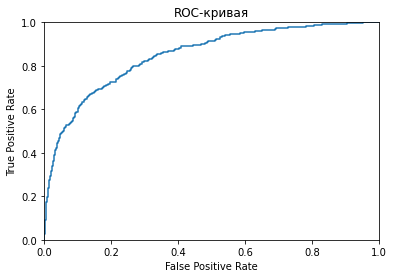

In [37]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=14)
model_forest.fit(features_upsampled, target_upsampled) 

probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print(roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

**Вывод**

Итого, при исследовании параметра AUC-ROC был сделан вывод о том, что модель является лучше константной, поэтому применение данной модели считается оправданным.